<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Михаил, привет! рад приветствовать тебя! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

In [17]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)

In [18]:
data_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)

In [19]:
data_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

In [20]:
data_train.shape, data_test.shape, data_full.shape

((16860, 86), (5856, 52), (22716, 86))

In [21]:
data_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [22]:
data_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [23]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

Проверим, как у нас посчитана recovery

In [25]:
#data_train['fin_recovery'] = ((data_train['final.output.concentrate_au'] 
#                              * (data_train['primary_cleaner.output.concentrate_au'] - 
#                                 data_train['final.output.tail_au']))/(data_train['primary_cleaner.output.concentrate_au'] *
#                                                        (data_train['final.output.concentrate_au'] - 
#                                                        data_train['final.output.tail_au']))) * 100

In [26]:
data_train['rough_recovery'] = ((data_train['rougher.output.concentrate_au'] 
                              * (data_train['rougher.input.feed_au'] - 
                                 data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au'] *
                                                        (data_train['rougher.output.concentrate_au'] - 
                                                        data_train['rougher.output.tail_au'])+0.000001)) * 100

In [27]:
#data_train[['fin_recovery','final.output.recovery']]

Вычислял для обоих рекавери, увидел что в проекте просят только для одного.

In [28]:
data_train[['rough_recovery','rougher.output.recovery']].describe()

,rough_recovery,rougher.output.recovery
count,1.461000e+04,14287.000000
mean,-7.748550e+06,82.394201
std,1.937667e+08,15.096808
min,-7.570591e+09,0.000000
25%,7.958832e+01,79.818372
50%,8.519551e+01,85.235997
75%,9.018499e+01,90.131691
max,1.380257e+04,100.000000


In [29]:
data_train_dropna = data_train.dropna()

Получается, если убрать все пропуски, будет 5800 показаний меньше. Необходимо посмотреть, как можно обойтись без этого.

In [30]:
data_train_dropna.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant                      11017 non-null float64
primary_c

In [31]:
data_train_dropna['difference'] = data_train_dropna['rougher.output.recovery'] - data_train_dropna['rough_recovery']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Найдем MAE для между этими величинами.

In [32]:
mean_absolute_error(data_train_dropna['rougher.output.recovery'], data_train_dropna['rough_recovery'])

3.984989910222653e-06

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
есть контакт)

In [33]:
data_train_dropna.query('difference != 0')[['rough_recovery','rougher.output.recovery']]

,rough_recovery,rougher.output.recovery
date,,
2016-01-15 00:00:00,87.107762,87.107763
2016-01-15 01:00:00,86.843260,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226429,87.226430
2016-01-15 04:00:00,86.688793,86.688794
...,...,...
2018-08-18 06:59:59,89.574375,89.574376
2018-08-18 07:59:59,87.724006,87.724007
2018-08-18 08:59:59,88.890577,88.890579


Думаю, можно сказать, что рекавери расчитано верно. Отличия в каких то далеких долях. 

Признаки, которых нет в тестовой выборке, можно сразу отбросить. Они нам не понадобятся.

In [34]:
columns_true = data_test.columns.tolist()
columns_train = data_train.columns.tolist()

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
ок!

In [35]:
for col in columns_train:
    if col not in columns_true:
        print(col)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

In [36]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_c

Добавляем в трейн сет данные, которых не хватает из полного сета. Считаем по формуле недостающий рекавери. Если что то остается NaN дропаем

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
понятна дорожная карта)

In [37]:
data_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [38]:
data_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rough_recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107762
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843260
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226429
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688793


In [39]:
data_train_test = data_train.fillna(data_full)

In [40]:
data_train.isna().sum()

final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
rough_recovery                                2250
Length: 87, dtype: int64

In [41]:
data_train[data_train['secondary_cleaner.state.floatbank6_a_level'].isna()]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rough_recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,5.782224,10.969985,9.30126,43.181003,74.257359,11.95976,2.064173,15.139256,3.091437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.217221
2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-20 10:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-20 11:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-21 23:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data_train_test[data_train_test['secondary_cleaner.state.floatbank6_a_level'].isna()]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rough_recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,5.782224,10.969985,9.30126,43.181003,74.257359,11.95976,2.064173,15.139256,3.091437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.217221
2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-20 10:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-20 11:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-21 23:59:59,0.010000,0.010000,0.01000,0.010000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data_train= data_train.fillna(data_full)

In [44]:
data_train['final.output.recovery'].isna().sum()

1521

In [45]:
data_train.dropna(subset = ['final.output.recovery'], inplace=True)

In [46]:
data_train['final.output.recovery'].isna().sum()

0

In [47]:
data_train.dropna(subset = ['rougher.output.recovery'], inplace=True)

In [48]:
data_train['rougher.output.recovery'].isna().sum()

0

In [49]:
data_train[['final.output.recovery', 'rougher.output.recovery']].describe()

,final.output.recovery,rougher.output.recovery
count,14149.000000,14149.000000
mean,66.518832,82.704502
std,10.295402,14.479156
min,0.000000,0.000000
25%,62.545817,79.993067
50%,67.432775,85.299462
75%,72.346428,90.165021
max,100.000000,100.000000


In [50]:
data_train = data_train.fillna(method = 'ffill')
data_test = data_test.fillna(method = 'ffill')

In [51]:
#data_train['rougher.output.recovery'] = ((data_train['rougher.output.concentrate_au'] 
#                              * (data_train['rougher.input.feed_au'] - 
#                                 data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au'] *
#                                                        (data_train['rougher.output.concentrate_au'] - 
#                                                        data_train['rougher.output.tail_au'])+ 0.01)) * 100

In [52]:
data_train.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
rough_recovery                                0
Length: 87, dtype: int64

In [53]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant                      14149 non-null float64
primary_c

Теперь убираем все, что не посчиталось в rougher.output.recovery 

In [54]:
data_train.dropna(subset = ['rougher.output.recovery'], inplace=True)

In [55]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant                      14149 non-null float64
primary_c

In [56]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rough_recovery
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,...,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,5.141921,10.132848,9.109311,44.003792,66.518832,9.607035,2.583179,10.510889,2.918421,133.213938,...,-478.702912,15.486812,-460.237231,16.774657,-483.957839,13.064236,-483.967726,19.576675,-506.805007,82.704504
std,1.369603,1.654925,2.886929,4.905261,10.295402,2.319069,0.983118,3.003888,0.903712,39.604988,...,50.739376,5.255555,58.848850,5.831978,37.892065,5.765567,39.206771,5.764496,37.086065,14.479159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668,-0.000000
25%,4.211500,9.296833,7.422466,43.276111,62.545817,7.997429,1.889827,8.810653,2.368607,106.859801,...,-500.628716,11.894590,-500.149141,11.083699,-500.363203,8.994384,-500.105994,14.989244,-500.745309,79.993067
50%,4.994607,10.297013,8.801909,44.872436,67.432775,9.480270,2.581476,10.514141,2.851025,132.999290,...,-499.681587,14.975474,-499.388853,17.931987,-499.702479,11.997537,-499.914556,19.984165,-500.061488,85.299461
75%,5.859495,11.170578,10.452148,46.166425,72.346428,11.003707,3.237211,11.932186,3.434764,159.825396,...,-477.486391,20.059286,-400.039047,21.346135,-487.864322,17.982826,-453.274822,24.991615,-499.536481,90.165020
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459,100.007450


In [57]:
data_train=data_train.reset_index(drop=True)

In [58]:
data_train[['final.output.recovery', 'rougher.output.recovery']].describe()

,final.output.recovery,rougher.output.recovery
count,14149.000000,14149.000000
mean,66.518832,82.704502
std,10.295402,14.479156
min,0.000000,0.000000
25%,62.545817,79.993067
50%,67.432775,85.299462
75%,72.346428,90.165021
max,100.000000,100.000000


In [59]:
data_test.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

Необходимо вытащить y_test для проверки в следующих этапах.

In [60]:
data_test = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

In [61]:
print(data_train.duplicated().sum(), data_test.duplicated().sum(), data_full.duplicated().sum())
data_train = data_train.drop_duplicates()
data_test = data_test.drop_duplicates()
data_full = data_full.drop_duplicates()
print(data_train.duplicated().sum(), data_test.duplicated().sum(), data_full.duplicated().sum())

0 8 22
0 0 0


In [62]:
data_test.isna().sum()

primary_cleaner.input.sulfate                   0
primary_cleaner.input.depressant                0
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                  0
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cleaner.state.floatbank8_b_air          0
primary_cleaner.state.floatbank8_b_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_d_level        0
rougher.input.feed_ag                           0
rougher.input.feed_pb                           0
rougher.input.feed_rate                         0
rougher.input.feed_size                         0
rougher.input.feed_sol                          0
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate               0
rougher.input.floatbank10_xanthate              0


In [63]:
data_test.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace=True)

In [64]:
data_test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
выводы по подготовке - нужны) Работа серьёзная проведена А точки не стоит после неё))

Первая задача. Посмотреть как меняется концентрация металлов в процессе очистки.
Так, нам нужны 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag'

In [50]:
data_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag','rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb']].describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,rougher.output.concentrate_pb,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb
count,22613.000000,22615.000000,22616.000000,22618.000000,22268.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22617.000000,22472.000000
mean,4.783211,9.097218,40.012803,7.691652,8.921110,29.212289,6.900646,17.879538,10.874484,8.065715,7.565838,3.305676
std,2.028993,3.227430,13.383652,3.109306,3.706314,10.539303,2.806948,6.790112,4.377924,3.125250,3.026954,1.446905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.018887,8.751353,42.385264,6.771102,7.834690,29.374406,6.374692,17.928729,10.126646,6.944415,6.485009,2.658814
50%,4.954671,9.914519,44.655820,8.265643,9.921116,32.359813,7.572855,20.003202,11.785127,8.302613,7.884832,3.432054
75%,5.863106,10.928598,46.113673,9.697896,11.266100,34.770726,8.477358,21.564238,13.615299,10.135202,9.668064,4.204960
max,16.001945,17.031899,53.611374,16.081632,17.081278,45.933934,18.394042,28.824507,24.480271,14.869652,14.093363,7.142594


In [51]:
data_full_drop = data_full.dropna()

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


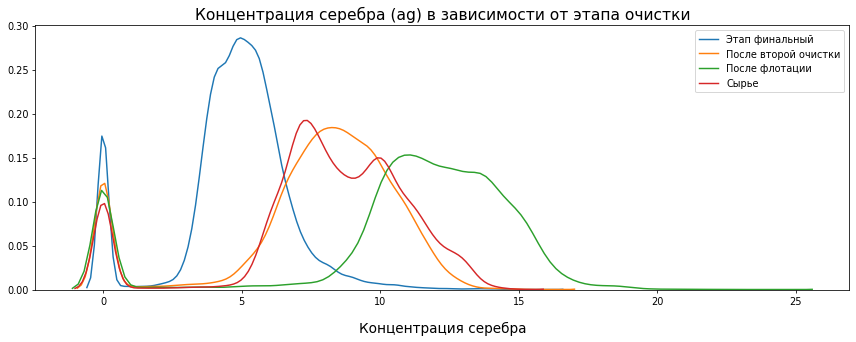

In [52]:
plt.figure(figsize=(15,5), dpi= 70)
plt.title('Концентрация серебра (ag) в зависимости от этапа очистки', fontsize=16)
plt.xlabel('Концентрация серебра', labelpad=15, fontsize=14)
sns.kdeplot(data=data_full['final.output.concentrate_ag'], label = 'Этап финальный')
sns.kdeplot(data=data_full['primary_cleaner.output.concentrate_ag'], label = 'После второй очистки')
sns.kdeplot(data=data_full['rougher.output.concentrate_ag'], label = 'После флотации')
sns.kdeplot(data=data_full['rougher.input.feed_ag'], label = 'Сырье')

По этому графику можно сказать,  что с каждой очисткой доля ag уменьшается.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
ОК)

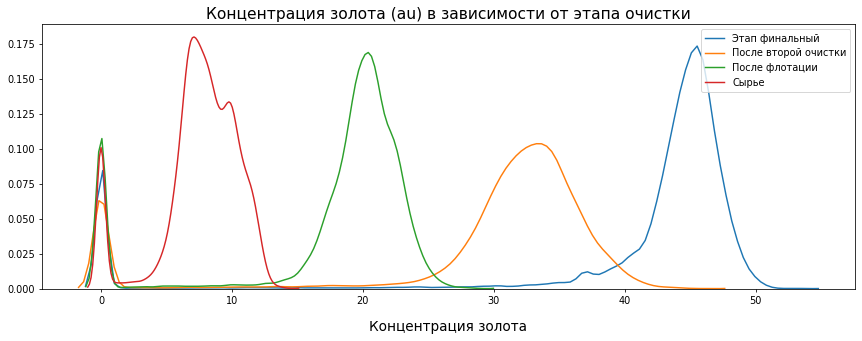

In [53]:
plt.figure(figsize=(15,5), dpi= 70)
plt.title('Концентрация золота (au) в зависимости от этапа очистки', fontsize=16)
plt.xlabel('Концентрация золота', labelpad=15, fontsize=14)
sns.kdeplot(data=data_full['final.output.concentrate_au'], label = 'Этап финальный')
sns.kdeplot(data=data_full['primary_cleaner.output.concentrate_au'], label = 'После второй очистки')
sns.kdeplot(data=data_full['rougher.output.concentrate_au'], label = 'После флотации')
sns.kdeplot(data=data_full['rougher.input.feed_au'], label = 'Сырье')


Доля золота в концентрате повышается с каждым этапом.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
наша тема)

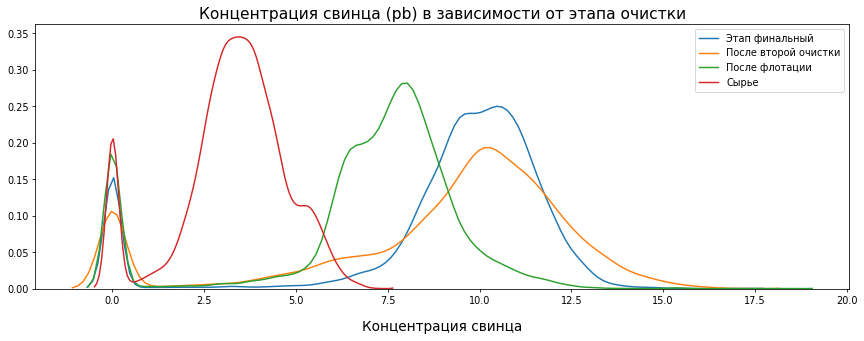

In [54]:
plt.figure(figsize=(15,5), dpi= 70)
plt.title('Концентрация свинца (pb) в зависимости от этапа очистки', fontsize=16)
plt.xlabel('Концентрация свинца', labelpad=15, fontsize=14)
sns.kdeplot(data=data_full['final.output.concentrate_pb'], label = 'Этап финальный')
sns.kdeplot(data=data_full['primary_cleaner.output.concentrate_pb'], label = 'После второй очистки')
sns.kdeplot(data=data_full['rougher.output.concentrate_pb'], label = 'После флотации')
sns.kdeplot(data=data_full['rougher.input.feed_pb'], label = 'Сырье')

Доля свинца после флотации увеличивается. После этого остается такой же, или немного увеличивается.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
свинец - блудный сын процессов очистки)

Второе задание. 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

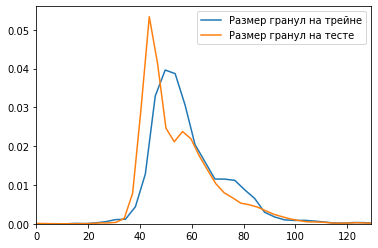

In [55]:
plt.xlim(0, data_train['rougher.input.feed_size'].mean() + data_train['rougher.input.feed_size'].std()*3)
sns.kdeplot(data=data_train['rougher.input.feed_size'], label = 'Размер гранул на трейне')
sns.kdeplot(data=data_test['rougher.input.feed_size'], label = 'Размер гранул на тесте')

In [56]:
data_train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [57]:
data_test['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

In [58]:
sample_1 = data_train['rougher.input.feed_size']
sample_2 = data_test['rougher.input.feed_size']

In [59]:
alpha = .05
results = st.ttest_ind(sample_1, sample_2, equal_var=True)
print('p-значение: ', results.pvalue)

p-значение:  1.6081245670847274e-33


In [60]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='orange'>
Если нулевую гиротезу отвергаем, то наоборот - распределенине размеров разное на данном уровен значимости. У нас тут есть ненормальность в данных : бимодальность (два горба) и скшенность - поэтому может быть вернее использовать критерий манна-уитни (сейчас Стьюдента). И тогда будет чуть иной результат.

Распределение размеров примерно одинаковое.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
пока оставим как есть, ок)

3 задание. 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

In [61]:
data_full['rougher.input.sum'] = (data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_au'] 
                                  + data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_sol'])

In [62]:
data_full['rougher.output.sum'] = (data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_au']
                                  + data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_sol'])

In [63]:
data_full['primary.output.sum'] = (data_full['primary_cleaner.output.concentrate_ag'] + data_full['primary_cleaner.output.concentrate_au']
                                  + data_full['primary_cleaner.output.concentrate_pb'] + data_full['primary_cleaner.output.concentrate_sol'])

In [64]:
data_full['final.output.sum'] = (data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_au']
                                  + data_full['final.output.concentrate_pb'] + data_full['final.output.concentrate_sol'])

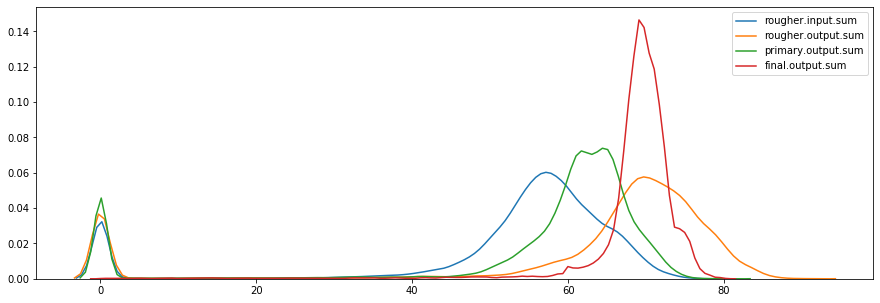

In [65]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=data_full['rougher.input.sum'])
sns.kdeplot(data=data_full['rougher.output.sum'])
sns.kdeplot(data=data_full['primary.output.sum'])
sns.kdeplot(data=data_full['final.output.sum'])

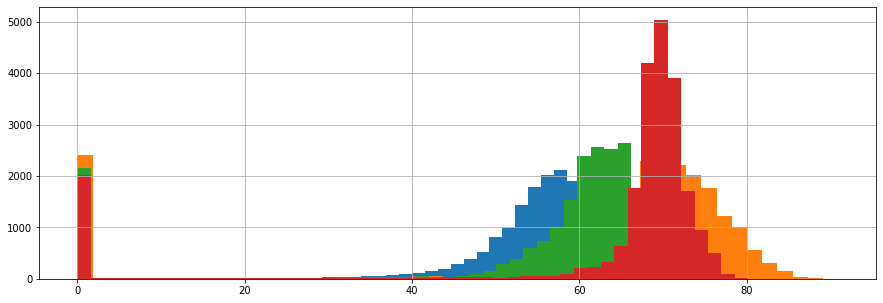

In [66]:
plt.figure(figsize=(15,5))
data_full['rougher.input.sum'].hist(bins=50)
data_full['rougher.output.sum'].hist(bins=50)
data_full['primary.output.sum'].hist(bins=50)
data_full['final.output.sum'].hist(bins=50)

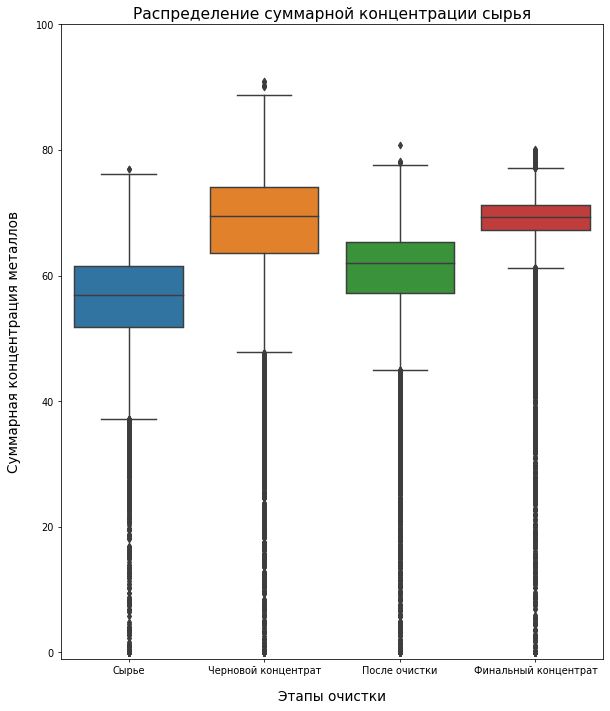

In [67]:
plt.figure(figsize=(10,12), dpi= 70)
sns.boxplot(data=data_full[['rougher.input.sum', 'rougher.output.sum', 'primary.output.sum', 'final.output.sum']])
plt.title('Распределение суммарной концентрации сырья', fontsize=16)
plt.ylim(-1, 100)
plt.xlabel('Этапы очистки', labelpad=15, fontsize=14)
plt.ylabel('Суммарная концентрация металлов', labelpad=15, fontsize=14)
plt.xticks(np.arange(4), ('Сырье', 'Черновой концентрат', 'После очистки', 'Финальный концентрат'))
plt.show()

In [68]:
data_full[['rougher.input.sum', 'rougher.output.sum', 'primary.output.sum','final.output.sum' ]].describe()

,rougher.input.sum,rougher.output.sum,primary.output.sum,final.output.sum
count,22241.000000,22526.000000,21918.000000,22314.000000
mean,52.273449,61.799418,55.471318,62.494004
std,17.653233,23.168341,19.757606,20.721610
min,0.000000,0.000000,0.000000,0.000000
25%,51.784664,63.558831,57.230377,67.206907
50%,56.939323,69.459530,61.957870,69.296036
75%,61.519755,74.058219,65.402045,71.166468
max,76.978947,90.964431,80.749343,80.210644


Каких то значимых аномалий не вижу. Большое кол-во выбросов в первом квартиле. Если мы будем учить только лес, то они не помешают. Для других моделей, которые плохо справляются с выбросами, они могут плохо влиять на модель. Предлагаю убрать их из обучающего набора. 

In [69]:
final_output_conc = (data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_au']
                                  + data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol'])

In [70]:
data_train_clean = data_train.query('@final_output_conc > 60')

In [71]:
data_train_clean1 = data_train_clean

In [72]:
data_train_clean1['final.output.sum'] = (data_train_clean1['final.output.concentrate_ag'] + data_train_clean1['final.output.concentrate_au']
                                  + data_train_clean1['final.output.concentrate_pb'] + data_train_clean1['final.output.concentrate_sol'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


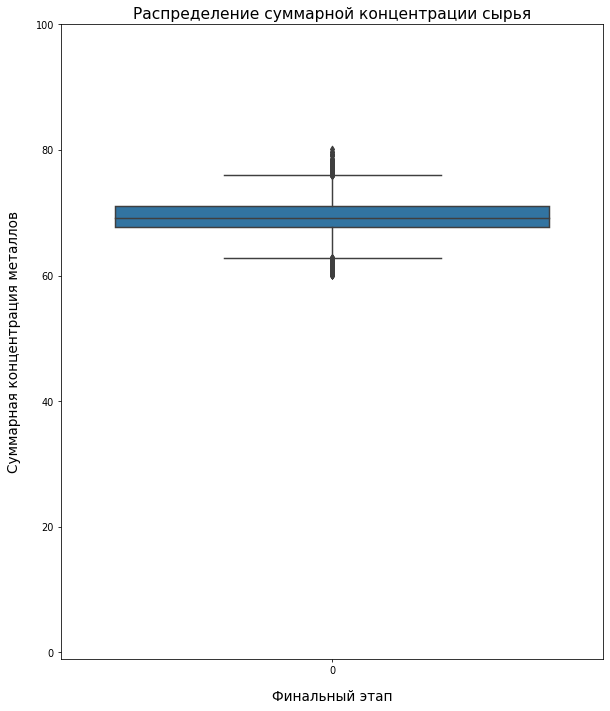

In [73]:
plt.figure(figsize=(10,12), dpi= 70)
sns.boxplot(data=data_train_clean1['final.output.sum'])
plt.title('Распределение суммарной концентрации сырья', fontsize=16)
plt.ylim(-1, 100)
plt.xlabel('Финальный этап', labelpad=15, fontsize=14)
plt.ylabel('Суммарная концентрация металлов', labelpad=15, fontsize=14)
plt.show()


Даже побольше можно удалить. Так лучше. Спасибо за замечание

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='orange'>
А не делал замечаний))<br>

В целом работа по удалению выбросов - ОК. здорово вышло<br>
В некоторых проектах - это важно, избавиться от выбросов<br>

А вот если обратиться к нашему проекту:<br>
1) Есть нулевые аномалии - и их надо "убить" это точно: просто зачем нам нулевые измерения.<br>
    
2)А вот с выбросами как в приниципе..<br>
Тут на обсуждение: наша цель - предсказывать модель на реальных данных. И вот эти выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.<br>
    
Поэтому, тут так: выбросы - это не всегда то, от чего надо избавляться))) Ещё зависит от бизнес-задачи.<br>
    
Кстати<br>
если говорить о теории выбросов, то вот это интервал q3+-1.5*iqr говорит действильно о них самых<br>
Но нет рекоммендаций к их удалению. Говорят так "на усмотрение бизнеса".<br>
А вот если взять вот этот интервал q3+3*iqr:  то тут уж с очень высокой вероятность можно говорить о грубых выбросах.

In [74]:
data_train.shape

(14149, 87)

In [75]:
data_train_clean.shape

(13677, 88)

# 3. Модель

Теперь оставим только те столбцы, которые есть в трейн.

In [76]:
X_train = data_train_clean[columns_true]

In [77]:
X_test = data_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis = 1)

In [78]:
X_train.shape, X_test.shape

((13677, 52), (5290, 52))

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
верно, контроль выборок  - нужен.

In [79]:
y_train_final = data_train_clean['final.output.recovery']

In [80]:
y_train_rough = data_train_clean['rougher.output.recovery']

In [81]:
y_test_final = data_test['final.output.recovery'] 

In [82]:
y_test_rough = data_test['rougher.output.recovery']

Все необходимое мы сделали. Осталось обучить модели, и посчитать скор.

In [83]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [84]:
smape_score = make_scorer(smape)

Скор сделали. Переходим к обучению модели. Так как я не убирал никаких выбросов и аномалий, используем рандом лес.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
поехали)<br>
ингода в скор добавляют ещё параметр: greater_is_better=False

In [85]:
#for n in range(80,101,10):
#    for i in range(8,11,2):
#        forest_model_rough = RandomForestRegressor(n_estimators=n, max_depth=i, random_state=42)
#        smape_score_forest_rough = cross_val_score(forest_model_rough, X_train, y_train_rough, cv=5, scoring=smape_score)
#        print('sMAPE =', smape_score_forest_rough.mean(), 'при n=', n, 'max_depth =',i)

In [86]:
#for n in range(80,101,10):
#    for i in range(8,11,2):        
#        forest_model_final = RandomForestRegressor(n_estimators=n, max_depth=i, random_state=42)
#        smape_score_forest_final = cross_val_score(forest_model_final, X_train, y_train_final, cv=5, scoring=smape_score)
#        print('sMAPE =', smape_score_forest_final.mean(), 'при n=', n, 'max_depth =',i)

Получается у первой моделе лучшие параметры число эстиматоров 80, глубина 8. У второй, 80 и 8.

Грид серч очень долго работал. Я решил перебрать основные гиперпараметры. Не перебирал много, так как не было задачи гнаться за долями процента.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
ОК

In [87]:
forest_model_final = RandomForestRegressor(n_estimators=80, max_depth=8, random_state=42)

In [88]:
smape_score_forest_final = cross_val_score(forest_model_final, X_train, y_train_final, cv=5, scoring=smape_score)

In [89]:
forest_model_rough = RandomForestRegressor(n_estimators=80, max_depth=8, random_state=42)

In [90]:
smape_score_forest_rough = cross_val_score(forest_model_rough, X_train, y_train_rough, cv=5, scoring=smape_score)

In [91]:
smape_out_forest = smape_score_forest_rough.mean() * 0.25 + smape_score_forest_final.mean() * 0.75
print('Final sMAPE forest=', smape_out_forest)

Final sMAPE forest= 9.706007572579846


Попробуем теперь обычную линейную модель.

In [92]:
linear_model_final = LinearRegression()

In [93]:
smape_score_lineal_final = cross_val_score(linear_model_final, X_train, y_train_final, cv=5, scoring=smape_score)

In [94]:
linear_model_rough = LinearRegression()

In [95]:
smape_score_lineal_rough = cross_val_score(linear_model_rough, X_train, y_train_rough, cv=5, scoring=smape_score)

In [96]:
smape_out_lineal = smape_score_lineal_rough.mean() * 0.25 + smape_score_lineal_final.mean() * 0.75
print('Final sMAPE lineal=', smape_out_lineal)

Final sMAPE lineal= 11.058084488321388


In [97]:
cbr_rough = CatBoostRegressor(random_state=42, 
                        early_stopping_rounds=300)

In [98]:
smape_score_cat_rough = cross_val_score(cbr_rough, X_train, y_train_rough, cv=5, scoring=smape_score)

0:	learn: 14.7747169	total: 56.1ms	remaining: 56s
1:	learn: 14.6213022	total: 151ms	remaining: 1m 15s
2:	learn: 14.4891609	total: 249ms	remaining: 1m 22s
3:	learn: 14.3605085	total: 344ms	remaining: 1m 25s
4:	learn: 14.2369586	total: 352ms	remaining: 1m 10s
5:	learn: 14.1136511	total: 447ms	remaining: 1m 14s
6:	learn: 14.0018304	total: 542ms	remaining: 1m 16s
7:	learn: 13.8795198	total: 552ms	remaining: 1m 8s
8:	learn: 13.7751255	total: 646ms	remaining: 1m 11s
9:	learn: 13.6717361	total: 740ms	remaining: 1m 13s
10:	learn: 13.5646249	total: 747ms	remaining: 1m 7s
11:	learn: 13.4526047	total: 844ms	remaining: 1m 9s
12:	learn: 13.3474578	total: 939ms	remaining: 1m 11s
13:	learn: 13.2439275	total: 1.04s	remaining: 1m 13s
14:	learn: 13.1551998	total: 1.05s	remaining: 1m 8s
15:	learn: 13.0793468	total: 1.14s	remaining: 1m 10s
16:	learn: 13.0051037	total: 1.24s	remaining: 1m 11s
17:	learn: 12.9239337	total: 1.24s	remaining: 1m 7s
18:	learn: 12.8509788	total: 1.34s	remaining: 1m 9s
19:	learn: 

In [99]:
cbr_final = CatBoostRegressor(random_state=42, 
                        early_stopping_rounds=300)

In [100]:
smape_score_cat_final = cross_val_score(cbr_rough, X_train, y_train_final, cv=5, scoring=smape_score)

0:	learn: 8.8798489	total: 7.99ms	remaining: 7.98s
1:	learn: 8.7874289	total: 30.5ms	remaining: 15.2s
2:	learn: 8.7019649	total: 125ms	remaining: 41.4s
3:	learn: 8.6241687	total: 133ms	remaining: 33s
4:	learn: 8.5461533	total: 230ms	remaining: 45.8s
5:	learn: 8.4709536	total: 324ms	remaining: 53.6s
6:	learn: 8.4075620	total: 331ms	remaining: 47s
7:	learn: 8.3384301	total: 428ms	remaining: 53.1s
8:	learn: 8.2736026	total: 525ms	remaining: 57.8s
9:	learn: 8.2120060	total: 621ms	remaining: 1m 1s
10:	learn: 8.1495177	total: 629ms	remaining: 56.5s
11:	learn: 8.0922072	total: 725ms	remaining: 59.7s
12:	learn: 8.0351016	total: 821ms	remaining: 1m 2s
13:	learn: 7.9784860	total: 828ms	remaining: 58.3s
14:	learn: 7.9269874	total: 923ms	remaining: 1m
15:	learn: 7.8791375	total: 1.02s	remaining: 1m 2s
16:	learn: 7.8290816	total: 1.12s	remaining: 1m 4s
17:	learn: 7.7845432	total: 1.12s	remaining: 1m 1s
18:	learn: 7.7350105	total: 1.22s	remaining: 1m 2s
19:	learn: 7.6933488	total: 1.32s	remaining: 1

In [101]:
smape_out_cat = smape_score_cat_rough.mean() * 0.25 + smape_score_cat_final.mean() * 0.75
print('Final sMAPE lineal=', smape_out_cat)

Final sMAPE lineal= 9.576444884532767


catboost ожидаемо дает лучший результат.
Теперь сделаем предикт.

In [102]:
forest_model_final = RandomForestRegressor(n_estimators=80, max_depth=8, random_state=42)

In [103]:
forest_model_final.fit(X_train, y_train_final)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [104]:
forest_model_rough = RandomForestRegressor(n_estimators=80, max_depth=8, random_state=42)

In [105]:
forest_model_rough.fit(X_train, y_train_rough)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [106]:
predict_forest_rough = forest_model_rough.predict(X_test)

In [107]:
predict_forest_final = forest_model_final.predict(X_test)

In [108]:
smape(predict_forest_rough, y_test_rough)*0.25 + smape(predict_forest_final, y_test_final)* 0.75

9.998313132111228

In [109]:
linear_model_rough.fit(X_train, y_train_rough)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
linear_model_final.fit(X_train, y_train_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
predict_linear_rough = linear_model_rough.predict(X_test)

In [112]:
predict_linear_final = linear_model_final.predict(X_test)

In [113]:
smape(predict_linear_rough, y_test_rough)*0.25 + smape(predict_linear_final, y_test_final)* 0.75

9.902147360179235

In [114]:
cbr_final.fit(X_train, y_train_final)

0:	learn: 8.9083533	total: 19.4ms	remaining: 19.4s
1:	learn: 8.8192006	total: 115ms	remaining: 57.4s
2:	learn: 8.7430978	total: 123ms	remaining: 41s
3:	learn: 8.6654804	total: 224ms	remaining: 55.7s
4:	learn: 8.5936716	total: 320ms	remaining: 1m 3s
5:	learn: 8.5251398	total: 413ms	remaining: 1m 8s
6:	learn: 8.4574585	total: 421ms	remaining: 59.7s
7:	learn: 8.3943255	total: 520ms	remaining: 1m 4s
8:	learn: 8.3275985	total: 620ms	remaining: 1m 8s
9:	learn: 8.2642077	total: 713ms	remaining: 1m 10s
10:	learn: 8.2044552	total: 800ms	remaining: 1m 11s
11:	learn: 8.1454390	total: 824ms	remaining: 1m 7s
12:	learn: 8.0863139	total: 915ms	remaining: 1m 9s
13:	learn: 8.0395743	total: 1.01s	remaining: 1m 11s
14:	learn: 7.9890561	total: 1.11s	remaining: 1m 12s
15:	learn: 7.9415139	total: 1.12s	remaining: 1m 8s
16:	learn: 7.8926443	total: 1.21s	remaining: 1m 10s
17:	learn: 7.8484022	total: 1.31s	remaining: 1m 11s
18:	learn: 7.8055127	total: 1.41s	remaining: 1m 12s
19:	learn: 7.7611832	total: 1.41s	r

In [115]:
cbr_rough.fit(X_train, y_train_rough)

0:	learn: 14.0966798	total: 8.24ms	remaining: 8.23s
1:	learn: 13.9705944	total: 80.6ms	remaining: 40.2s
2:	learn: 13.8425206	total: 178ms	remaining: 59.3s
3:	learn: 13.7212119	total: 263ms	remaining: 1m 5s
4:	learn: 13.6057817	total: 278ms	remaining: 55.3s
5:	learn: 13.5034697	total: 378ms	remaining: 1m 2s
6:	learn: 13.4000014	total: 474ms	remaining: 1m 7s
7:	learn: 13.3015209	total: 571ms	remaining: 1m 10s
8:	learn: 13.2190515	total: 664ms	remaining: 1m 13s
9:	learn: 13.1296411	total: 751ms	remaining: 1m 14s
10:	learn: 13.0341833	total: 765ms	remaining: 1m 8s
11:	learn: 12.9412159	total: 862ms	remaining: 1m 10s
12:	learn: 12.8664525	total: 961ms	remaining: 1m 12s
13:	learn: 12.7819570	total: 1.05s	remaining: 1m 13s
14:	learn: 12.6965285	total: 1.06s	remaining: 1m 9s
15:	learn: 12.6156669	total: 1.16s	remaining: 1m 11s
16:	learn: 12.5428530	total: 1.25s	remaining: 1m 12s
17:	learn: 12.4778857	total: 1.34s	remaining: 1m 13s
18:	learn: 12.4118584	total: 1.35s	remaining: 1m 9s
19:	learn: 

In [116]:
predict_cat_rough = cbr_rough.predict(X_test)

In [117]:
predict_cat_final = cbr_final.predict(X_test)

In [118]:
smape(predict_cat_rough, y_test_rough)*0.25 + smape(predict_cat_final, y_test_final)* 0.75

9.527316965778443

In [119]:
data_test1 = data_test

In [120]:
data_test1['y_train_rough_mean'] = y_train_rough.mean()

In [121]:
data_test1['y_train_rough_mean'].shape

(5290,)

In [122]:
data_test1['y_train_final_mean'] = y_train_final.mean()

In [123]:
data_test1['y_train_final_mean'].shape

(5290,)

In [124]:
smape(data_test1['y_train_rough_mean'], y_test_rough)*0.25 + smape(data_test1['y_train_final_mean'], y_test_final)* 0.75

10.060971881382894

Получается 10.067 это порог адекватности и мы его улучшили совсем немного.

## Вывод

Лучшей моделью оказался Catboost. Я бы предложил использовать бустинг.
Не понятно, почему лес показал себя хуже линейной модели.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Михаил, <br>
Интересная работа от тебя.<br>
Понятно, логично, без напряжения, экномично (к вопросу о переборе). Проект отличается именно этим: всё по делу и со смыслом.<br>С выбросами предлагаю только подумать, может есть резон в том, что не всегда их надо удалять.<br><br>
    
Верно, наша модель не далеко оторвалась от константной<br>
В прииципе, если побороться с гиперпараметрами, то можно ещё выжать в точности. И уверен, глядя на твой проект, что ты смог бы это сделать, при достаточном количестве времени.<br>

Техническая сторона у тебя уже имеет определённый уровень.<br>
А если будет какая нехватка - сейчас можно в "великом разуме" найти всякого-всякого.<br>

Думаю, что самое тут время поразмышлять, а что ещё для дальнейшего улучшения качества моделирования?<br>
Попробовал систематизировать:<br>
1) качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё)<br>
2) Работа с моделями:<br>
- Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили, или придумать что-то гибридное из имеющихся факторов... В общем ещё раз пройтись по бизнес-цепочке процесса<br>
- Подбор самих моделей. показателей самих моделей <br>
- Подбор параметров выбранных показателей у выбранных моделей <br>
    
3)Плюс, есть же ещё параметры самого процесса: температура, скорость конвейера, сила удара чего-то там....<br> Они тоже могут помочь<br>
4) ну и разобраться ещё раз с физическими и производственными процессами. ВОзможно приниципиально иное решение можно создать.<br> 
    
В общем-то другого и нет. Только такие возможности.<br>
Если углубится в так называемый "Статистический анализ данных" (SPC) - по сути это превариетльная подготовка данных в этом проекте, можно найти какое-нибудь решение<br>

Но цель проекта достигнута:<br>
1) пройдены важные этапы построения производственной модели<br>
2) возникло много дополнительных вопросов))

Спасиба за работу) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!